<a href="https://colab.research.google.com/github/fanqingsong/code_snippet/blob/master/%E2%80%9Cfcc_book_recommendation_knn_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will create a book recommendation algorithm using **K-Nearest Neighbors**.

You will use the [Book-Crossings dataset](http://www2.informatik.uni-freiburg.de/~cziegler/BX/). This dataset contains 1.1 million ratings (scale of 1-10) of 270,000 books by 90,000 users. 

After importing and cleaning the data, use `NearestNeighbors` from `sklearn.neighbors` to develop a model that shows books that are similar to a given book. The Nearest Neighbors algorithm measures distance to determine the “closeness” of instances.

Create a function named `get_recommends` that takes a book title (from the dataset) as an argument and returns a list of 5 similar books with their distances from the book argument.

This code:

`get_recommends("The Queen of the Damned (Vampire Chronicles (Paperback))")`

should return:

```
[
  'The Queen of the Damned (Vampire Chronicles (Paperback))',
  [
    ['Catch 22', 0.793983519077301], 
    ['The Witching Hour (Lives of the Mayfair Witches)', 0.7448656558990479], 
    ['Interview with the Vampire', 0.7345068454742432],
    ['The Tale of the Body Thief (Vampire Chronicles (Paperback))', 0.5376338362693787],
    ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.5178412199020386]
  ]
]
```

Notice that the data returned from `get_recommends()` is a list. The first element in the list is the book title passed in to the function. The second element in the list is a list of five more lists. Each of the five lists contains a recommended book and the distance from the recommended book to the book passed in to the function.

If you graph the dataset (optional), you will notice that most books are not rated frequently. To ensure statistical significance, remove from the dataset users with less than 200 ratings and books with less than 100 ratings.

The first three cells import libraries you may need and the data to use. The final cell is for testing. Write all your code in between those cells.

In [2]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [3]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2021-05-07 14:36:58--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M  36.8MB/s    in 0.7s    

2021-05-07 14:36:59 (36.8 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [4]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [5]:
# add your code here - consider creating a new cell for each section of code

df_books.head()


,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [6]:
df_ratings.head()

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [16]:
user_counter = df_ratings['user'].value_counts()
# print(type(user_counter))
# print(user_counter)

user_counter_limit = user_counter[ user_counter > 200 ]
# print(user_counter_limit.index)

# filter out the data with all users' rating number more than 200
df_ratings_cut = df_ratings[df_ratings['user'].isin(user_counter_limit.index)]
# print(df_ratings_cut)


book_counter = df_ratings['isbn'].value_counts()
# print(book_counter)

book_counter_limit = book_counter[book_counter > 100]
# print(book_counter_limit)

# filter out the data with all books' rating number more than 100
df_ratings_cut = df_ratings_cut[df_ratings['isbn'].isin(book_counter_limit.index)]
print(df_ratings_cut)
print(df_ratings_cut.shape)
print(list(df_ratings_cut.columns))


           user        isbn  rating
1456     277427  002542730X    10.0
1469     277427  0060930535     0.0
1471     277427  0060934417     0.0
1474     277427  0061009059     9.0
1484     277427  0140067477     0.0
...         ...         ...     ...
1147304  275970  0804111359     0.0
1147436  275970  140003065X     0.0
1147439  275970  1400031346     0.0
1147440  275970  1400031354     0.0
1147441  275970  1400031362     0.0

[49254 rows x 3 columns]
(49254, 3)
['user', 'isbn', 'rating']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


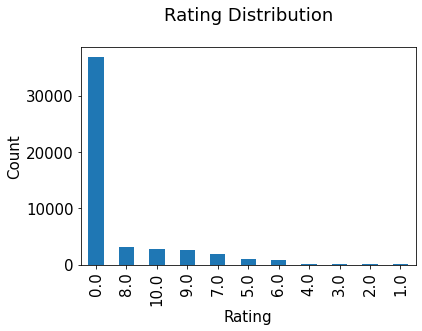

In [18]:
plt.rc("font", size=15)
df_ratings_cut.rating.value_counts(sort=True).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [19]:
rating_count = pd.DataFrame(df_ratings_cut.groupby('isbn')['rating'].count())
rating_count.sort_values('rating', ascending=False).head()

,rating
isbn,
0971880107,363
0316666343,270
0060928336,220
0440214041,218
0385504209,215


In [25]:
user_rating = df_ratings_cut.drop_duplicates(['user', 'isbn'])
user_rating_pivot = user_rating.pivot(index = 'isbn', columns = 'user', values = 'rating').fillna(0)

user_rating_pivot_index = user_rating_pivot.index
user_rating_pivot_colums = user_rating_pivot.columns
print(user_rating_pivot.shape)
print(user_rating_pivot.head())


(721, 882)
user        254     2276    2766    2977    ...  277427  277478  277639  278418
isbn                                        ...                                
002542730X     0.0     0.0     0.0     0.0  ...    10.0     0.0     0.0     0.0
0060008032     0.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
0060096195     0.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
006016848X     0.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
0060173289     0.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0

[5 rows x 882 columns]


In [26]:

user_rating_matrix = csr_matrix(user_rating_pivot.values)
# print(user_rating_matrix)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [39]:
query_index = np.random.choice(user_rating_pivot.shape[0])
# print(query_index)

query_target = user_rating_pivot.iloc[query_index, :]
# print(query_target)
query_target_vector = query_target.values
# print(query_target_vector)
query_target_vector = query_target_vector.reshape(1, -1)
# print(query_target_vector)

distances, indices = model_knn.kneighbors(query_target_vector, n_neighbors = 6)
# print(distances)
distances = distances.flatten()
print(distances)

indices = indices.flatten()
print(indices)

for i in range(0, len(distances)):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, user_rating_pivot.index[indices[i]], distances[i]))

[1.1920929e-07 7.4428004e-01 7.6380801e-01 7.6483822e-01 7.7356434e-01
 8.0388069e-01]
[114 363 699 542 115 340]
Recommendations for 0316781010:

1: 0440235596, with distance of 0.7442800402641296:
2: 0871136791, with distance of 0.763808012008667:
3: 055356160X, with distance of 0.7648382186889648:
4: 0316781142, with distance of 0.773564338684082:
5: 0440212561, with distance of 0.8038806915283203:


In [51]:
book_name = "Where the Heart Is (Oprah's Book Club (Paperback))"
target = df_books[df_books.title == book_name]
# print(target)
target_isbn = target.isbn.values[0]
print(target_isbn)

user_rating_pivot[user_rating_pivot.index == target_isbn]

0446672211


user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,9856,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,15957,16106,...,264317,264321,264637,265115,265313,265595,265889,266056,266226,266753,266865,266866,267635,268030,268032,268110,268330,268622,268932,269566,269719,269728,269890,270713,270820,271195,271284,271448,271705,273979,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0446672211,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):
  recommended_books = []

  recommended_books.append(book)

  target = df_books[df_books.title == book]
  target_isbn = target.isbn.values[0]

  query_target = user_rating_pivot[user_rating_pivot.index == target_isbn]

  # print(query_target)
  query_target_vector = query_target.values
  # print(query_target_vector)
  query_target_vector = query_target_vector.reshape(1, -1)
  # print(query_target_vector)

  distances, indices = model_knn.kneighbors(query_target_vector, n_neighbors = 5)
  distances = distances.flatten()
  # print(distances)

  indices = indices.flatten()
  # print(indices)

  book_items = []
  for i in range(0, len(distances)):
    if i == 0:
      print('Recommendations for {0}:\n'.format(user_rating_pivot.index[query_index]))
    else:
      book_distance = distances[i]
      book_isbn = user_rating_pivot.index[indices[i]]
      book_object = df_books[df_books.isbn == book_isbn]
      book_title = book_object.title.values[0]

      print('{0}: {1}, with distance of {2}:'.format(i, book_isbn, book_distance))
      one_book = []
      one_book.append(book_title)
      one_book.append(book_distance)

      book_items.append(one_book)

  # print(book_items)
  book_items.sort(key=lambda x: x[1], reverse=True)

  recommended_books.append(book_items)

  return recommended_books

# books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
# print(books)

Use the cell below to test your function. The `test_book_recommendation()` function will inform you if you passed the challenge or need to keep trying.

In [72]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2): 
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You havn't passed yet. Keep trying!")

test_book_recommendation()

Recommendations for 0316781010:

1: 0316666343, with distance of 0.7230184078216553:
2: 0060987561, with distance of 0.7677075266838074:
3: 0345447840, with distance of 0.7699410915374756:
4: 0316782505, with distance of 0.7708583474159241:
["Where the Heart Is (Oprah's Book Club (Paperback))", [['The Weight of Water', 0.77085835], ['The Surgeon', 0.7699411], ['I Know This Much Is True', 0.7677075], ['The Lovely Bones: A Novel', 0.7230184]]]
Recommendations for 0316781010:

1: 0316666343, with distance of 0.7230184078216553:
2: 0060987561, with distance of 0.7677075266838074:
3: 0345447840, with distance of 0.7699410915374756:
4: 0316782505, with distance of 0.7708583474159241:
You passed the challenge! 🎉🎉🎉🎉🎉
